In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the HIV.xlsx file with estimated HIV prevalance % data (ages 15-49)
HIV = pd.read_excel("/Users/shristidhakal/Documents/Grad School/INFO5502/HIV.xlsx")
#renaming the countries column to "Country" in HIV.xlsx
HIV = HIV.rename(columns={'Estimated HIV Prevalence% - (Ages 15-49)': 'Country'})
HIV.head(3)

,Country,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#importing countries_by_continent file. This is a separate new file.. 
#..that has a list of countries separated by their respective continent.
continent = pd.read_excel("/Users/shristidhakal/Documents/Grad School/INFO5502/countries_by_continent.xlsx")
continent.head(3)

,Country,Continent
0,Afghanistan,Asia
1,Bahrain,Asia
2,Bangladesh,Asia


In [4]:
#performing a left inner join to join HIV data and countries_by_continent data
merged_HIV = pd.merge(left=continent, right=HIV, how='left', on=['Country', 'Country'])
merged_HIV.head(3)

,Country,Continent,1979,1980,1981,1982,1983,1984,1985,1986,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06
1,Bahrain,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bangladesh,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06


In [5]:
#locating columns: years 2000-2011
years=merged_HIV.loc[:,['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']]
years.head(5)

/Users/shristidhakal/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.30,0.30
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#calculating average of each country from 2000-2011
merged_HIV['average_2000to2011'] = years.mean(axis=1, skipna = 'True')
merged_HIV.head(5)

,Country,Continent,1979,1980,1981,1982,1983,1984,1985,1986,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,average_2000to2011
0,Afghanistan,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,0.060000
1,Bahrain,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bangladesh,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.060000
3,Bhutan,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.10,0.10,0.10,0.10,0.10,0.20,0.20,0.30,0.30,0.266667
4,Brunei,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#grouping countries by continent
highest_hiv = merged_HIV.groupby(['Continent', 'Country', 'average_2000to2011']).idxmax(axis=1, skipna=True)
highest_hiv.head(5)

Continent  Country   average_2000to2011    
Africa     Angola    2.100000            45    2009
           Benin     1.200000            46    1997
           Botswana  23.733333           47    2001
           Burundi   1.433333            49    1995
           Cameroon  4.700000            50    2000
dtype: object

In [8]:
#countries in each continent with highest HIV from 2000 to 2011
#highest averages at the end..
highest_hiv = merged_HIV.loc[merged_HIV.groupby('Continent')['average_2000to2011'].idxmax()]
highest_hiv.head(6)


,Country,Continent,1979,1980,1981,1982,1983,1984,1985,1986,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,average_2000to2011
91,Swaziland,Africa,NaN,NaN,NaN,0.01097,NaN,NaN,NaN,NaN,...,25.1,25.5,25.6,25.7,25.8,25.9,25.8,25.9,26.0,25.900000
37,Thailand,Asia,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,...,1.5,1.5,1.5,1.4,1.4,1.3,1.3,1.2,1.2,1.233333
111,Estonia,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9,1.0,1.1,1.1,1.2,1.2,1.2,1.3,1.3,1.266667
146,Bahamas,North America,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.1,3.1,2.9,2.8,2.8,2.833333
188,Papua New Guinea,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,0.7,0.8,0.8,0.9,0.9,0.7,0.7,0.7,0.700000
174,Guyana,South America,0.030135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3,1.2,1.1,1.1,1.0,1.2,1.2,1.1,1.1,1.133333


In [9]:
#country in each continent with lowest HIV from 2000 to 2011
#lowest averages at the end..
lowest_hiv = merged_HIV.loc[merged_HIV.groupby('Continent')['average_2000to2011'].idxmin()]
lowest_hiv.head(6)

,Country,Continent,1979,1980,1981,1982,1983,1984,1985,1986,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,average_2000to2011
58,Egypt,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.060000
0,Afghanistan,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,0.060000
107,Croatia,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.060000
151,Cuba,North America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,0.10,0.10,0.10,0.10,0.10,0.10,0.20,0.20,0.166667
181,Fiji,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.10,0.10,0.10,0.10,0.10,0.10,0.06,0.06,0.10,0.073333
169,Bolivia,South America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.20,0.20,0.20,0.20,0.20,0.20,0.30,0.30,0.30,0.300000


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

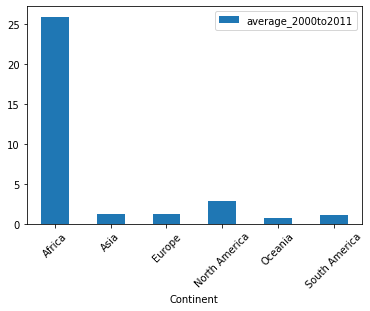

In [10]:
#bar chart showing highest avg. HIV in each continent 2000-2011 ages 15-49
highest_hiv.plot.bar(x='Continent', y='average_2000to2011', rot=0)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

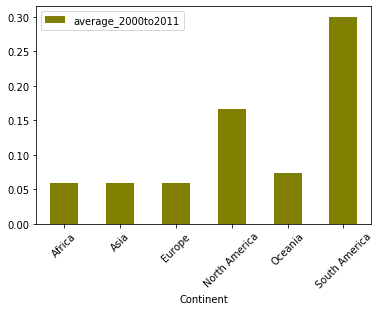

In [11]:
#bar chart showing lowest avg. HIV in each continent 2000-2011 ages 15-49
lowest_hiv.plot.bar(x='Continent', y='average_2000to2011', rot=0, 
                    color='olive')
plt.xticks(rotation=45)

In [12]:
#assigning binary values to help differentiate the highs and lows, and
#putting the high and low values together for plotting
average = merged_HIV.groupby(['Continent']).mean()
average.head(10)
highest_hiv['binary'] = 'high'
lowest_hiv['binary'] = 'low'
highest_lowest = pd.concat([highest_hiv, lowest_hiv, average], axis=0)
highest_lowest.head(8)

/Users/shristidhakal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,Country,Continent,1979,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,average_2000to2011,binary
91,Swaziland,Africa,NaN,NaN,NaN,0.01097,NaN,NaN,NaN,NaN,...,25.50,25.60,25.70,25.80,25.90,25.80,25.90,26.00,25.900000,high
37,Thailand,Asia,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,...,1.50,1.50,1.40,1.40,1.30,1.30,1.20,1.20,1.233333,high
111,Estonia,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,1.10,1.10,1.20,1.20,1.20,1.30,1.30,1.266667,high
146,Bahamas,North America,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.00,3.00,3.00,3.10,3.10,2.90,2.80,2.80,2.833333,high
188,Papua New Guinea,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.70,0.80,0.80,0.90,0.90,0.70,0.70,0.70,0.700000,high
174,Guyana,South America,0.030135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.20,1.10,1.10,1.00,1.20,1.20,1.10,1.10,1.133333,high
58,Egypt,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.060000,low
0,Afghanistan,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,0.060000,low


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

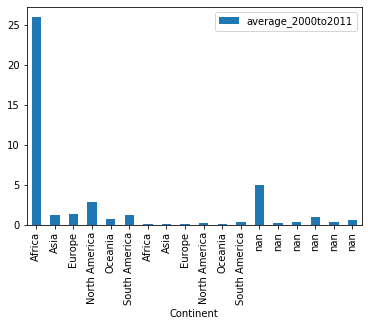

In [13]:
#plot: high and low average HIV by continent
highest_lowest.plot.bar(x='Continent', y='average_2000to2011', rot=0)
plt.xticks(rotation='vertical')

In [14]:
#countries without the highest and lowest HIV values selected
other_countries = merged_HIV.loc[(merged_HIV['Country'] == "Brazil") | 
                                 (merged_HIV['Country'] == "United States") | 
                                 (merged_HIV['Country'] == "Nepal") | 
                                 (merged_HIV['Country'] == "South Africa") | 
                                 (merged_HIV['Country'] == "China") | 
                                 (merged_HIV['Country'] == "Australia") |
                                 (merged_HIV['Country'] == "India") | 
                                 (merged_HIV['Country'] == "Uganda") |
                                 (merged_HIV['Country'] == "Haiti") | 
                                 (merged_HIV['Country'] == "Jamaica") |
                                 (merged_HIV['Country'] == "Finland")]
other_countries.head(10)

,Country,Continent,1979,1980,1981,1982,1983,1984,1985,1986,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,average_2000to2011
7,China,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.060000
9,India,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4,0.39,0.37,0.37,0.34,0.32,0.31,NaN,NaN,0.310000
26,Nepal,Asia,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,...,0.5,0.50,0.40,0.40,0.40,0.40,0.40,0.3,0.30,0.333333
88,South Africa,Africa,NaN,NaN,0.014209,NaN,NaN,NaN,NaN,NaN,...,18.0,18.10,18.10,18.10,18.00,17.90,17.20,17.3,17.30,17.266667
95,Uganda,Africa,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.6,6.40,6.40,6.30,6.30,6.40,6.90,7.0,7.20,7.033333
112,Finland,Europe,NaN,NaN,NaN,NaN,0.010558,NaN,NaN,NaN,...,0.1,0.10,0.10,0.10,0.10,0.10,0.10,0.1,0.10,0.100000
157,Haiti,North America,0.155026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.3,2.20,2.10,2.10,2.00,2.00,1.90,1.9,1.80,1.866667
159,Jamaica,North America,0.014489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.8,1.80,1.80,1.70,1.70,1.70,1.80,1.8,1.80,1.800000
167,United States,North America,0.031764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5,0.50,0.60,0.60,0.60,0.60,0.60,0.6,0.60,0.600000
170,Brazil,South America,0.094479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4,0.40,0.40,0.40,0.40,0.45,0.30,0.3,0.30,0.300000


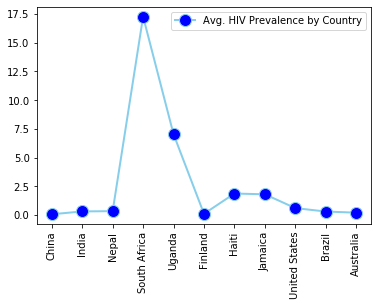

In [15]:
#Average HIV prevalence ages 15-49, years 2000-2011, plot by Country
#Of countries that lie between the highest or the lowest HIV prevalence
plt.plot( 'Country', 'average_2000to2011', data=other_countries, 
         marker='o', markerfacecolor='blue', markersize=12, 
         color='skyblue', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend(["Avg. HIV Prevalence by Country"]);


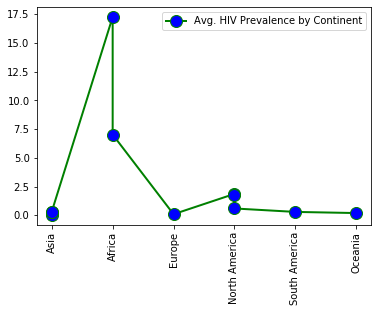

In [16]:
#Average HIV prevalence ages 15-49, years 2000-2011, plot by Continent
#Of selected countries that lie between the highest or the lowest HIV prevalence
plt.plot( 'Continent', 'average_2000to2011', data=other_countries, 
         marker='o', markerfacecolor='blue', markersize=12, 
         color='green', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend(["Avg. HIV Prevalence by Continent"]);

In [17]:
#average HIV estimated prvalence of each country from 1979 to 2011 
merged_HIV['average_1979to2011'] = merged_HIV.mean(axis=1, skipna = 'True')
merged_HIV.head(5)

,Country,Continent,1979,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,average_2000to2011,average_1979to2011
0,Afghanistan,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,0.060000,0.060000
1,Bahrain,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bangladesh,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.060000,0.060000
3,Bhutan,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.10,0.10,0.10,0.10,0.20,0.20,0.30,0.30,0.266667,0.110725
4,Brunei,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#grouping average HIV from 1970-2011 by continent
#averages at the end
averages_new = merged_HIV.groupby(['Continent']).mean()
averages_new.head(5)

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,average_2000to2011,average_1979to2011
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,0.038769,0.013923,0.011185,0.011773,0.011911,0.011477,0.010948,NaN,0.010400,NaN,...,5.663182,5.583636,5.497273,5.429091,5.372273,5.067826,5.024348,4.945106,4.984823,4.395722
Asia,0.012168,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,0.010175,NaN,...,0.231600,0.226800,0.224400,0.220800,0.224000,0.232917,0.229565,0.230833,0.228667,0.203151
Europe,0.014247,NaN,0.012948,0.014927,0.015850,NaN,0.032011,NaN,NaN,NaN,...,0.229444,0.237778,0.243333,0.251111,0.251111,0.282778,0.289444,0.289444,0.287222,0.191037
North America,0.039628,NaN,NaN,0.010653,NaN,NaN,0.012270,0.009510,NaN,NaN,...,1.029412,1.035294,1.041176,1.029412,1.052941,1.000000,0.993750,0.987500,0.993750,0.951246
Oceania,NaN,NaN,NaN,NaN,0.012683,NaN,NaN,0.011372,0.010175,NaN,...,0.250000,0.275000,0.275000,0.300000,0.300000,0.265000,0.265000,0.275000,0.268333,0.177503


In [19]:
#creating a new table with a more simplified indexing to plot line charts
new_table = pd.DataFrame(columns=['Years', 'Africa', 'Asia', 'Europe', 
                                  'North America', 'South America','Oceania'])

new_table['Years'] = averages_new.columns
new_table['Africa'] = pd.DataFrame(averages_new.loc['Africa'].values)
new_table['Asia'] = pd.DataFrame(averages_new.loc['Asia'].values)
new_table['Europe'] = pd.DataFrame(averages_new.loc['Europe'].values)
new_table['North America'] = pd.DataFrame(averages_new.loc['North America'].values)
new_table['South America'] = pd.DataFrame(averages_new.loc['South America'].values)
new_table['Oceania'] = pd.DataFrame(averages_new.loc['Oceania'].values)

new_table.head(5)


,Years,Africa,Asia,Europe,North America,South America,Oceania
0,1979,0.038769,0.012168,0.014247,0.039628,0.029865,NaN
1,1980,0.013923,NaN,NaN,NaN,0.011931,NaN
2,1981,0.011185,NaN,0.012948,NaN,NaN,NaN
3,1982,0.011773,NaN,0.014927,0.010653,NaN,NaN
4,1983,0.011911,NaN,0.015850,NaN,0.009743,0.012683


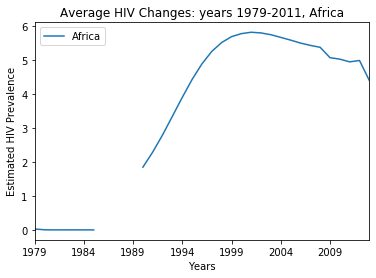

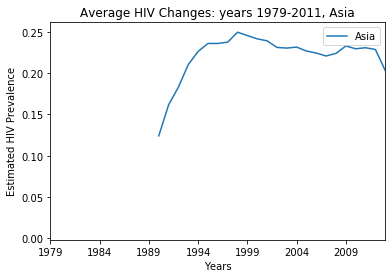

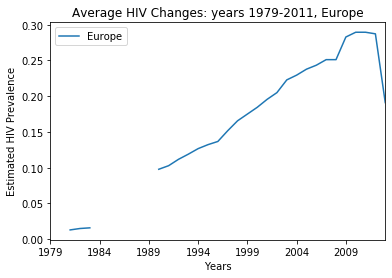

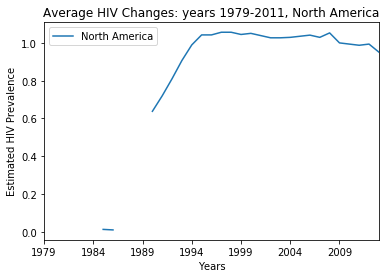

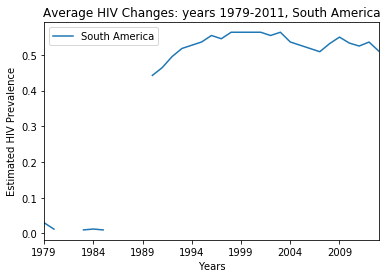

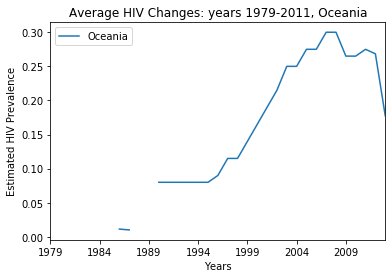

In [20]:
#Line chart for each continent showing changes in the average HIV estimated..
#..prevalence from 1979 to 2011.

africa_plot = new_table[['Years', 'Africa']].plot('Years')
africa_plot.set_ylabel('Estimated HIV Prevalence')
africa_plot.title.set_text('Average HIV Changes: years 1979-2011, Africa')

asia_plot = new_table[['Years', 'Asia']].plot('Years')
asia_plot.set_ylabel('Estimated HIV Prevalence')
asia_plot.title.set_text('Average HIV Changes: years 1979-2011, Asia')

europe_plot = new_table[['Years', 'Europe']].plot('Years')
europe_plot.set_ylabel('Estimated HIV Prevalence')
europe_plot.title.set_text('Average HIV Changes: years 1979-2011, Europe')

north_america_plot = new_table[['Years', 'North America']].plot('Years')
north_america_plot.set_ylabel('Estimated HIV Prevalence')
north_america_plot.title.set_text('Average HIV Changes: years 1979-2011, North America')

south_america_plot = new_table[['Years', 'South America']].plot('Years')
south_america_plot.set_ylabel('Estimated HIV Prevalence')
south_america_plot.title.set_text('Average HIV Changes: years 1979-2011, South America')

oceania_plot = new_table[['Years', 'Oceania']].plot('Years')
oceania_plot.set_ylabel('Estimated HIV Prevalence')
oceania_plot.title.set_text('Average HIV Changes: years 1979-2011, Oceania')


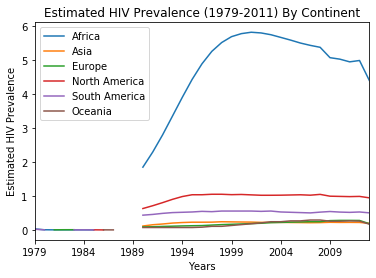

In [21]:
#overlaid line chart of estimated HIV prevalence (1979-2011) by continent
plot = new_table.plot('Years')
plot.set_ylabel('Estimated HIV Prevalence')
plot.title.set_text('Estimated HIV Prevalence (1979-2011) By Continent')

Text(0, 0.5, 'HIV Est. Prevalence in 1990')

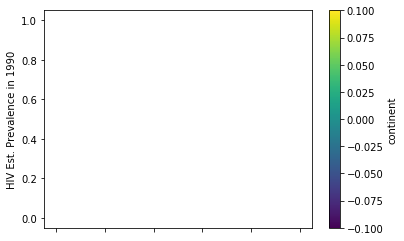

In [26]:
#scatter plot showing HIV data of 1990 by continent 
#scatter plot looks empty because most of the values were missing for 1990
avg_1990 = merged_HIV.loc[:, ['Country', 'Continent', '1990']]

avg_1990_1 = avg_1990.groupby('Continent').mean().iloc[0]['1990']
avg_1990_2 = avg_1990.groupby('Continent').mean().iloc[1]['1990']
avg_1990_3 = avg_1990.groupby('Continent').mean().iloc[2]['1990']
avg_1990_4 = avg_1990.groupby('Continent').mean().iloc[3]['1990']
avg_1990_5 = avg_1990.groupby('Continent').mean().iloc[4]['1990']

avg_1990.loc[avg_1990.Continent == 'Africa', '1990a'] = avg_1990_1 
avg_1990.loc[avg_1990.Continent == 'Africa', 'continent'] = 1
avg_1990.loc[avg_1990.Continent == 'Asia', '1990a'] = avg_1990_2 
avg_1990.loc[avg_1990.Continent == 'Asia', 'continent'] = 2
avg_1990.loc[avg_1990.Continent == 'Europe', '1990a'] = avg_1990_3
avg_1990.loc[avg_1990.Continent == 'Europe', 'continent'] = 3
avg_1990.loc[avg_1990.Continent == 'North America', '1990a'] = avg_1990_4
avg_1990.loc[avg_1990.Continent == 'North America', 'continent'] = 4
avg_1990.loc[avg_1990.Continent == 'South America', '1990a'] = avg_1990_5
avg_1990.loc[avg_1990.Continent == 'South America', 'continent'] = 5


plot_1990 = avg_1990.plot.scatter('1990a', '1990', c='continent', cmap='viridis')
plot_1990.set_xlabel('Average HIV Prevalence by Continent in 1990')
plot_1990.set_ylabel('HIV Est. Prevalence in 1990')


Text(0, 0.5, 'HIV Est. Prevalence in 2010')

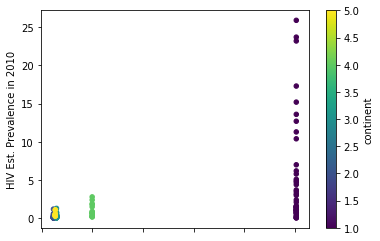

In [25]:
#scatter plot showing HIV data of 2010 by continent 

avg_2010 = merged_HIV.loc[:, ['Country', 'Continent', '2010']]

avg_2010_1 = avg_2010.groupby('Continent').mean().iloc[0]['2010']
avg_2010_2 = avg_2010.groupby('Continent').mean().iloc[1]['2010']
avg_2010_3 = avg_2010.groupby('Continent').mean().iloc[2]['2010']
avg_2010_4 = avg_2010.groupby('Continent').mean().iloc[3]['2010']
avg_2010_5 = avg_2010.groupby('Continent').mean().iloc[4]['2010']

avg_2010.loc[avg_2010.Continent == 'Africa', '2010a'] = avg_2010_1 
avg_2010.loc[avg_2010.Continent == 'Africa', 'continent'] = 1
avg_2010.loc[avg_2010.Continent == 'Asia', '2010a'] = avg_2010_2 
avg_2010.loc[avg_2010.Continent == 'Asia', 'continent'] = 2
avg_2010.loc[avg_2010.Continent == 'Europe', '2010a'] = avg_2010_3
avg_2010.loc[avg_2010.Continent == 'Europe', 'continent'] = 3
avg_2010.loc[avg_2010.Continent == 'North America', '2010a'] = avg_2010_4
avg_2010.loc[avg_2010.Continent == 'North America', 'continent'] = 4
avg_2010.loc[avg_2010.Continent == 'South America', '2010a'] = avg_2010_5
avg_2010.loc[avg_2010.Continent == 'South America', 'continent'] = 5


plot_2010 = avg_2010.plot.scatter('2010a', '2010', c='continent', cmap='viridis')
plot_2010.set_xlabel('Average HIV Prevalence by Continent in 2010')
plot_2010.set_ylabel('HIV Est. Prevalence in 2010')